## Import packages

In [ ]:
import os
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import copy
import sys

## Cell name

In [ ]:
cell_name = 'CL090_230515'

## Read fluorescence dFF structure data

In [ ]:
root_path = "/content/drive/MyDrive/Fluorescence_Data/FluoData4Fitting_Average"

path_ = os.path.join(root_path, cell_name, cell_name + 'red_dFFStructuresrun4.mat')
mat_data = scipy.io.loadmat(path_)
fluo_dFF_run4 = mat_data['Master_dFF']
fluo_dFF_run4 = fluo_dFF_run4[:, :-1] # delete the last column (49th)
# print(type(fluo_dFF_run4))
# print(fluo_dFF_run4.shape)
# print(fluo_dFF_run4[0,0].shape)

conca_dFF_run4 = np.empty((0,fluo_dFF_run4[0,0].shape[2]))
index_record = []
action = True
while action:
    action = False
    for index, value in np.ndenumerate(fluo_dFF_run4):
        value = np.squeeze(value)
        # print(value.shape)
        # print(value[-31:, :].shape)
        if conca_dFF_run4.shape[0] == 0:
            conca_dFF_run4 = np.concatenate((conca_dFF_run4, value), axis=0)
            index_record = index_record + [index]
            action = True
            break
        if np.array_equal(conca_dFF_run4[:31, :], value[-31:, :]):
            conca_dFF_run4 = np.concatenate((value[:-31, :], conca_dFF_run4), axis=0)
            index_record = [index] + index_record
            action = True
            break
        if np.array_equal(conca_dFF_run4[-31:, :], value[:31, :]):
            conca_dFF_run4 = np.concatenate((conca_dFF_run4, value[31:, :]), axis=0)
            index_record = index_record + [index]
            action = True
            break
print(conca_dFF_run4.shape)

# arr[:31, :]
# arr[-31:, :]
# [0:31, :]
# [62:93, :]
# data_squeeze = np.squeeze(fluo_dFF_run4[0,0])
# print(data_squeeze.shape)
# empty_array = np.concatenate((empty_array, array1, array2), axis=0)

FileNotFoundError: ignored

## Read pupil data

In [ ]:
root_path = "/content/drive/MyDrive/Fluorescence_Data/FluoData4Fitting_Average"

### Read pupil F

In [ ]:
# fucntion for calculate pre 2s mean, stimulation 2s mean, and post 2s mean
def calculate_means_by_ranges(arr): # input shape is (93, 1, 10)
    range1_mean = np.mean(arr[0:31], axis=0)
    range2_mean = np.mean(arr[31:62], axis=0)
    range3_mean = np.mean(arr[62:93], axis=0)

    # Transpose
    range1_mean = np.transpose(range1_mean)
    range2_mean = np.transpose(range2_mean)
    range3_mean = np.transpose(range3_mean)

    # Combine means into a 10x3 array
    combined_means = np.concatenate((range1_mean, range2_mean, range3_mean), axis=1)

    return combined_means

#### sum/mean along conditions

In [ ]:
### read dFF values for pupil size for each run (round)

## run 4

# read and calculate the pre 2s mean, stimulation 2s mean, and post 2s mean
path_ = os.path.join(root_path, cell_name, cell_name + 'green_PupilArea_Run4.mat')
mat_data = scipy.io.loadmat(path_)
pupil_area_run4 = mat_data['Master_f']
pupil_area_run4 = pupil_area_run4[:, :-1] # delete the last column (49th)
for index, value in np.ndenumerate(pupil_area_run4):
    value = calculate_means_by_ranges(value) # here, value is a copy, so changing value will not change pupil_area_run4
    pupil_area_run4[index] = value # change original pupil_area_run4
# print(pupil_area_run4.shape)
# print(type(pupil_area_run4))
# print(type(pupil_area_run4[0,1]))
# print(pupil_area_run4[0,1].shape)

# sum and average red data to see the decay
sum_mat_pupil_run4 = np.zeros((pupil_area_run4.shape[0], 1), dtype=np.ndarray)
mean_mat_pupil_run4 = np.zeros((pupil_area_run4.shape[0], 1), dtype=np.ndarray)
for i in range(pupil_area_run4.shape[0]):
    sum = np.zeros((pupil_area_run4[0,0].shape[0], 1))
    for j in range(pupil_area_run4.shape[1]):
        sum = sum + pupil_area_run4[i,j]
    # print(np.sum(sum))
    sum_mat_pupil_run4[i, 0] = sum
    mean_mat_pupil_run4[i, 0] = sum / pupil_area_run4.shape[1]


## run 5

# read and calculate the pre 2s mean, stimulation 2s mean, and post 2s mean
path_ = os.path.join(root_path, cell_name, cell_name + 'green_PupilArea_Run5.mat')
mat_data = scipy.io.loadmat(path_)
pupil_area_run5 = mat_data['Master_f']
pupil_area_run5 = pupil_area_run5[:, :-1] # delete the last column (49th)
for index, value in np.ndenumerate(pupil_area_run5):
    value = calculate_means_by_ranges(value) # here, value is a copy, so changing value will not change pupil_area_run5
    pupil_area_run5[index] = value # change original pupil_area_run5
# print(pupil_area_run5.shape)
# print(type(pupil_area_run5))
# print(type(pupil_area_run5[0,1]))
# print(pupil_area_run5[0,1].shape)

# sum and average red data to see the decay
sum_mat_pupil_run5 = np.zeros((pupil_area_run5.shape[0], 1), dtype=np.ndarray)
mean_mat_pupil_run5 = np.zeros((pupil_area_run5.shape[0], 1), dtype=np.ndarray)
for i in range(pupil_area_run5.shape[0]):
    sum = np.zeros((pupil_area_run5[0,0].shape[0], 1))
    for j in range(pupil_area_run5.shape[1]):
        sum = sum + pupil_area_run5[i,j]
    # print(np.sum(sum))
    sum_mat_pupil_run5[i, 0] = sum
    mean_mat_pupil_run5[i, 0] = sum / pupil_area_run5.shape[1]


## run 6

# read and calculate the pre 2s mean, stimulation 2s mean, and post 2s mean
path_ = os.path.join(root_path, cell_name, cell_name + 'green_PupilArea_Run6.mat')
mat_data = scipy.io.loadmat(path_)
pupil_area_run6 = mat_data['Master_f']
pupil_area_run6 = pupil_area_run6[:, :-1] # delete the last column (49th)
for index, value in np.ndenumerate(pupil_area_run6):
    value = calculate_means_by_ranges(value) # here, value is a copy, so changing value will not change pupil_area_run6
    pupil_area_run6[index] = value # change original pupil_area_run6
# print(pupil_area_run6.shape)
# print(type(pupil_area_run6))
# print(type(pupil_area_run6[0,1]))
# print(pupil_area_run6[0,1].shape)

# sum and average red data to see the decay
sum_mat_pupil_run6 = np.zeros((pupil_area_run6.shape[0], 1), dtype=np.ndarray)
mean_mat_pupil_run6 = np.zeros((pupil_area_run6.shape[0], 1), dtype=np.ndarray)
for i in range(pupil_area_run6.shape[0]):
    sum = np.zeros((pupil_area_run6[0,0].shape[0], 1))
    for j in range(pupil_area_run6.shape[1]):
        sum = sum + pupil_area_run6[i,j]
    # print(np.sum(sum))
    sum_mat_pupil_run6[i, 0] = sum
    mean_mat_pupil_run6[i, 0] = sum / pupil_area_run6.shape[1]


# print(sum_mat_pupil_run4)
# print(sum_mat_pupil_run5)
# print(sum_mat_pupil_run6)
sum_mat_pupil = np.concatenate((sum_mat_pupil_run4[0,0], sum_mat_pupil_run5[0,0], sum_mat_pupil_run6[0,0]), axis=0)
mean_mat_pupil = np.concatenate((mean_mat_pupil_run4[0,0], mean_mat_pupil_run5[0,0], mean_mat_pupil_run6[0,0]), axis=0)
# print(sum_mat_pupil.T)
# print(mean_mat_pupil.T)


# plot
data = mean_mat_pupil
x = np.arange(1, 31)
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust the figure size as desired
ax.plot(x,data[:, 0], label='Pre-stimulation (2s)')
ax.plot(x,data[:, 1], label='During stimulation (2s)')
ax.plot(x,data[:, 2], label='Post-stimulation (2s)')
ax.legend(fontsize='medium')
ax.set_xlabel('Repeat', fontsize=12)  # Adjust the label size as desired
ax.set_ylabel('Pupil size in F', fontsize=12)  # Adjust the label size as desired
ax.axvline(x=10.5, color='orange', linestyle='--')
ax.axvline(x=20.5, color='orange', linestyle='--')
ax.text(5, 7200, 'Round 4', ha='center', va='center', fontsize=12)
ax.text(15.5, 7200, 'Round 5', ha='center', va='center', fontsize=12)
ax.text(25.5, 7200, 'Round 6', ha='center', va='center', fontsize=12)
ax.set_title('Pupil size curve (mean of conditions)', fontsize=14)  # Adjust the title size as desired
ax.tick_params(axis='both', labelsize=10)  # Adjust the tick size as desired
plt.show()


#### sum/mean along repeats

In [ ]:
### read dFF values for pupil size for each run (round)

## run 4

# read and calculate the pre 2s mean, stimulation 2s mean, and post 2s mean
path_ = os.path.join(root_path, cell_name, cell_name + 'green_PupilArea_Run4.mat')
mat_data = scipy.io.loadmat(path_)
pupil_area_run4 = mat_data['Master_f']
pupil_area_run4 = pupil_area_run4[:, :-1] # delete the last column (49th)
for index, value in np.ndenumerate(pupil_area_run4):
    value = calculate_means_by_ranges(value) # here, value is a copy, so changing value will not change pupil_area_run4
    pupil_area_run4[index] = value # change original pupil_area_run4
# print(pupil_area_run4.shape)
# print(type(pupil_area_run4))
# print(type(pupil_area_run4[0,1]))
# print(pupil_area_run4[0,1].shape)

## run 5

# read and calculate the pre 2s mean, stimulation 2s mean, and post 2s mean
path_ = os.path.join(root_path, cell_name, cell_name + 'green_PupilArea_Run5.mat')
mat_data = scipy.io.loadmat(path_)
pupil_area_run5 = mat_data['Master_f']
pupil_area_run5 = pupil_area_run5[:, :-1] # delete the last column (49th)
for index, value in np.ndenumerate(pupil_area_run5):
    value = calculate_means_by_ranges(value) # here, value is a copy, so changing value will not change pupil_area_run5
    pupil_area_run5[index] = value # change original pupil_area_run5
# print(pupil_area_run5.shape)
# print(type(pupil_area_run5))
# print(type(pupil_area_run5[0,1]))
# print(pupil_area_run5[0,1].shape)

## run 6

# read and calculate the pre 2s mean, stimulation 2s mean, and post 2s mean
path_ = os.path.join(root_path, cell_name, cell_name + 'green_PupilArea_Run6.mat')
mat_data = scipy.io.loadmat(path_)
pupil_area_run6 = mat_data['Master_f']
pupil_area_run6 = pupil_area_run6[:, :-1] # delete the last column (49th)
for index, value in np.ndenumerate(pupil_area_run6):
    value = calculate_means_by_ranges(value) # here, value is a copy, so changing value will not change pupil_area_run6
    pupil_area_run6[index] = value # change original pupil_area_run6
# print(pupil_area_run6.shape)
# print(type(pupil_area_run6))
# print(type(pupil_area_run6[0,1]))
# print(pupil_area_run6[0,1].shape)

# stack/concatenate all conditions

# satstackck elements in pupil_area_run4 along the 0th axis
concatenated_run4 = np.stack(pupil_area_run4[0,:], axis=2)
# stack elements in pupil_area_run5 along the 0th axis
concatenated_run5 = np.stack(pupil_area_run5[0,:], axis=2)
# stack elements in pupil_area_run6 along the 0th axis
concatenated_run6 = np.stack(pupil_area_run6[0,:], axis=2)
# Concatenate the results from all three runs along the 1st axis
result = np.concatenate((concatenated_run4, concatenated_run5, concatenated_run6), axis=0)
# print(concatenated_run4.shape)
# print(result.shape)


# plot
data = np.mean(result, axis=0)
x = np.arange(1, 49)
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust the figure size as desired
ax.plot(x,data[0, :], label='Pre-stimulation (2s)')
ax.plot(x,data[1, :], label='During stimulation (2s)')
ax.plot(x,data[2, :], label='Post-stimulation (2s)')
ax.legend(fontsize='medium')
ax.set_xlabel('Conditions', fontsize=12)  # Adjust the label size as desired
ax.set_ylabel('Pupil size in F', fontsize=12)  # Adjust the label size as desired
ax.axvline(x=6.5, color='orange', linestyle='--')
ax.axvline(x=12.5, color='orange', linestyle='--')
ax.axvline(x=18.5, color='orange', linestyle='--')
ax.axvline(x=24.5, color='orange', linestyle='--')
ax.axvline(x=30.5, color='orange', linestyle='--')
ax.axvline(x=36.5, color='orange', linestyle='--')
ax.axvline(x=42.5, color='orange', linestyle='--')
ax.set_title('Pupil size curve (mean of repeats)', fontsize=14)  # Adjust the title size as desired
ax.tick_params(axis='both', labelsize=10)  # Adjust the tick size as desired
# Customize x-axis ticks
tick_positions = [1,5,10,15,20,25,30,35,40,45,48]
plt.xticks(tick_positions)
plt.show()


#### mean for each (condition, repeat)

In [ ]:
### read dFF values for pupil size for each run (round)

## run 4

# read and calculate the pre 2s mean, stimulation 2s mean, and post 2s mean
path_ = os.path.join(root_path, cell_name, cell_name + 'green_PupilArea_Run4.mat')
mat_data = scipy.io.loadmat(path_)
pupil_area_run4 = mat_data['Master_f']
pupil_area_run4 = pupil_area_run4[:, :-1] # delete the last column (49th)
for index, value in np.ndenumerate(pupil_area_run4):
    value = calculate_means_by_ranges(value) # here, value is a copy, so changing value will not change pupil_area_run4
    pupil_area_run4[index] = value # change original pupil_area_run4
# print(pupil_area_run4.shape)
# print(type(pupil_area_run4))
# print(type(pupil_area_run4[0,1]))
# print(pupil_area_run4[0,1].shape)
fine_mean_mat_pupil_run4 = copy.deepcopy(pupil_area_run4)

## run 5

# read and calculate the pre 2s mean, stimulation 2s mean, and post 2s mean
path_ = os.path.join(root_path, cell_name, cell_name + 'green_PupilArea_Run5.mat')
mat_data = scipy.io.loadmat(path_)
pupil_area_run5 = mat_data['Master_f']
pupil_area_run5 = pupil_area_run5[:, :-1] # delete the last column (49th)
for index, value in np.ndenumerate(pupil_area_run5):
    value = calculate_means_by_ranges(value) # here, value is a copy, so changing value will not change pupil_area_run5
    pupil_area_run5[index] = value # change original pupil_area_run5
# print(pupil_area_run5.shape)
# print(type(pupil_area_run5))
# print(type(pupil_area_run5[0,1]))
# print(pupil_area_run5[0,1].shape)
fine_mean_mat_pupil_run5 = copy.deepcopy(pupil_area_run5)

## run 6

# read and calculate the pre 2s mean, stimulation 2s mean, and post 2s mean
path_ = os.path.join(root_path, cell_name, cell_name + 'green_PupilArea_Run6.mat')
mat_data = scipy.io.loadmat(path_)
pupil_area_run6 = mat_data['Master_f']
pupil_area_run6 = pupil_area_run6[:, :-1] # delete the last column (49th)
for index, value in np.ndenumerate(pupil_area_run6):
    value = calculate_means_by_ranges(value) # here, value is a copy, so changing value will not change pupil_area_run6
    pupil_area_run6[index] = value # change original pupil_area_run6
# print(pupil_area_run6.shape)
# print(type(pupil_area_run6))
# print(type(pupil_area_run6[0,1]))
# print(pupil_area_run6[0,1].shape)
fine_mean_mat_pupil_run6 = copy.deepcopy(pupil_area_run6)

# concatenate
fine_mean_mat_pupil = np.concatenate((fine_mean_mat_pupil_run4,
                    fine_mean_mat_pupil_run5,
                    fine_mean_mat_pupil_run6),
                    axis = 0)
print(fine_mean_mat_pupil.shape)
print(fine_mean_mat_pupil[0,1].shape)

### Read pupil dFF

In [ ]:
### read dFF values for pupil size for each run (round)

# run 4
path_ = os.path.join(root_path, cell_name, cell_name + 'green_PupilArea_Run4.mat')
mat_data = scipy.io.loadmat(path_)
pupil_area_run4 = mat_data['Master_dFF_mean']
pupil_area_run4 = pupil_area_run4[:, :-1]
print(type(pupil_area_run4[0,1]))
print(pupil_area_run4[0,1].shape)
# sum red data to see the decay
sum_mat_pupil_run4 = np.zeros((pupil_area_run4.shape[0], 1), dtype=np.ndarray)
for i in range(pupil_area_run4.shape[0]):
    sum = np.zeros((pupil_area_run4[0,0].shape[0], 1))
    for j in range(pupil_area_run4.shape[1]):
        sum = sum + pupil_area_run4[i,j]
    # print(np.sum(sum))
    sum_mat_pupil_run4[i, 0] = sum

# run 5
path_ = os.path.join(root_path, cell_name, cell_name + 'green_PupilArea_Run5.mat')
mat_data = scipy.io.loadmat(path_)
pupil_area_run5 = mat_data['Master_dFF_mean']
pupil_area_run5 = pupil_area_run5[:, :-1]
print(type(pupil_area_run5[0,1]))
print(pupil_area_run5[0,1].shape)
# sum red data to see the decay
sum_mat_pupil_run5 = np.zeros((pupil_area_run5.shape[0], 1), dtype=np.ndarray)
for i in range(pupil_area_run5.shape[0]):
    sum = np.zeros((pupil_area_run5[0,0].shape[0], 1))
    for j in range(pupil_area_run5.shape[1]):
        sum = sum + pupil_area_run5[i,j]
    # print(np.sum(sum))
    sum_mat_pupil_run5[i, 0] = sum

# run 6
path_ = os.path.join(root_path, cell_name, cell_name + 'green_PupilArea_Run6.mat')
mat_data = scipy.io.loadmat(path_)
pupil_area_run6 = mat_data['Master_dFF_mean']
pupil_area_run6 = pupil_area_run6[:, :-1]
print(type(pupil_area_run6[0,1]))
print(pupil_area_run6[0,1].shape)
# sum red data to see the decay
sum_mat_pupil_run6 = np.zeros((pupil_area_run6.shape[0], 1), dtype=np.ndarray)
for i in range(pupil_area_run6.shape[0]):
    sum = np.zeros((pupil_area_run6[0,0].shape[0], 1))
    for j in range(pupil_area_run6.shape[1]):
        sum = sum + pupil_area_run6[i,j]
    # print(np.sum(sum))
    sum_mat_pupil_run6[i, 0] = sum


# print(sum_mat_pupil_run4)
# print(sum_mat_pupil_run5)
# print(sum_mat_pupil_run6)
sum_mat_pupil = np.concatenate((sum_mat_pupil_run4[0,0], sum_mat_pupil_run5[0,0], sum_mat_pupil_run6[0,0]), axis=0)
print(sum_mat_pupil.T)


data = sum_mat_pupil
x = np.arange(1, 31)
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust the figure size as desired
ax.plot(x, data)
ax.set_xlabel('Repeat', fontsize=12)  # Adjust the label size as desired
ax.set_ylabel('Pupil size in dFF', fontsize=12)  # Adjust the label size as desired
ax.axvline(x=10.5, color='orange', linestyle='--')
ax.axvline(x=20.5, color='orange', linestyle='--')
ax.text(5, -1.6, 'Round 4', ha='center', va='center', fontsize=12)
ax.text(15.5, -1.6, 'Round 5', ha='center', va='center', fontsize=12)
ax.text(25.5, -1.6, 'Round 6', ha='center', va='center', fontsize=12)
ax.set_title('Pupil size curve', fontsize=14)  # Adjust the title size as desired
ax.tick_params(axis='both', labelsize=10)  # Adjust the tick size as desired
plt.show()


## Read fluorescence dFF mean data into dicts

In [ ]:
root_path = "/content/drive/MyDrive/Fluorescence_Data/FluoData4Fitting_Average"

# Get a list of all the subdirectories: subfolders are viewed as cell names
cell_names = [f for f in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, f))]
# for cell in cell_names:
#     print(cell)

# Create a dictionary with default values
default_value = 0
cell_data_dict = {cell: default_value for cell in cell_names}
# print(cell_data_dict)

file_suffixes = ['green_Axon.mat', 'green_dFFMeanValues.mat', 'red_dFFMeanValues.mat']

for cell in cell_names:
    print(cell)
    file_names = [cell + suffix for suffix in file_suffixes]

    path_ = file_names[0] # green_Axon.mat
    path_ = os.path.join(root_path, cell, path_)
    mat_data = scipy.io.loadmat(path_)
    axons = mat_data['Axons'] # array containing nested arrays/sub-arrays
    # Squeeze the outer array
    axons = np.squeeze(axons, axis=0)
    for i in range(len(axons)):
        # Squeeze the inner array and convert the data type to 'int'
        axons[i] = np.squeeze(axons[i].astype(int), axis=0)
    # final axons' length is the number of groups with
    # each elements being a nested array of components

    path_ = file_names[1] # green_dFFMeanValues.mat
    path_ = os.path.join(root_path, cell, path_)
    mat_data = scipy.io.loadmat(path_)
    dFFMeanValues_green = mat_data['dFFMeanValues'] # 3 by 49

    path_ = file_names[2] # red_dFFMeanValues.mat
    path_ = os.path.join(root_path, cell, path_)
    mat_data = scipy.io.loadmat(path_)
    dFFMeanValues_red = mat_data['dFFMeanValues'] # 3 by 49

    cell_data_dict[cell] = {'axons': axons,
                'green_dFFMeanValues': dFFMeanValues_green,
                'red_dFFMeanValues': dFFMeanValues_red}

# # Print keys and types
# for key, value in cell_data_dict.items():
#     print("-- * * * * * --")
#     print(key, type(value))
#     for key_, value_ in value.items():
#         print(key_, type(value_))
# print("-- * * * * * --")

## Decay restoration of red and trend visualization (including setting whether considering pupil size in regression)

In the following chunks, the code


```
# at most one of the following options is True
mean_pupil_size_along_conditions_multiply = False # mean
mean_pupil_size_each_condition_each_repeat_multiply = True # fine
```

are used for setting how to considering pupile size in regression.

In [ ]:
cell_data = copy.deepcopy(cell_data_dict[cell_name])
# cell_data = copy.deepcopy(cell_data_dict['CL075_230303'])
# cell_data = cell_data_dict['CL090_230515']
# cell_data = cell_data_dict['CL075_230303']

# # the following 4 lines of code used for checking if cell_data and
# # cell_data_dict changed after running the code of this chunk; compare
# # with the printing at the end
# print(cell_data['red_dFFMeanValues'][1,1][0,-1])
# print(cell_data['green_dFFMeanValues'][1,1][0,-1])
# print(cell_data_dict['CL090_230515']['red_dFFMeanValues'][1,1][0,-1])
# print(cell_data_dict['CL090_230515']['green_dFFMeanValues'][1,1][0,-1])


delete_small_group = True # delete groups (axons) with less than 3 components

data_green = cell_data['green_dFFMeanValues'][:,:-1] # exclude 49th column
data_red = cell_data['red_dFFMeanValues'][:,:-1] # exclude 49th column
# data_red = cell_data['red_dFFMeanValues'][:,:-1].copy() # exclude 49th column
# the .copy() method is for a NumPy array. Using .copy() on a NumPy array,
# it creates a new copied array but it is a separate and independent object.
# Modifying the copied array will not affect the original array.
# # here uses .copy() to avoid cell_data and cell_data['red_dFFMeanValues'] be changed in
# # the later code line data_red[i,j] = red_recover_factor[i,0] * data_red[i,j], or we can use
# # cell_data = copy.deepcopy(cell_data_dict['CL090_230515']) to guarantee cell_data['red_dFFMeanValues']
# # will not be changed (cell_data will be changed).
# # copy.deepcopy will recursively copy all nested objects; copy.copy cannot do this.
data_axons = cell_data['axons']

# sum red data to see the decay
sum_mat_red = np.zeros((data_red.shape[0], 1), dtype=np.ndarray)
for i in range(data_red.shape[0]):
    sum = np.zeros((data_red[0,0].shape[0], 1))
    for j in range(data_red.shape[1]):
        sum = sum + data_red[i,j]
    # print(np.sum(sum))
    sum_mat_red[i, 0] = sum
# print(sum_mat_red)

# Normalization of red
sum_mat_red_n = np.zeros((data_red.shape[0], 1), dtype=np.ndarray)
max_value = -np.inf
for i in range(sum_mat_red.shape[0]):
    for j in range(sum_mat_red.shape[1]):
        max_value = max(max_value, np.max(np.abs(sum_mat_red[i, j])))
for i in range(sum_mat_red.shape[0]):
    for j in range(sum_mat_red.shape[1]):
        element = sum_mat_red[i, j]
        sum_mat_red_n[i, j] = element / max_value
# print(sum_mat_red_n.shape)

# vstack sum_mat_red_n
stacked_sum_mat_red_n = np.empty((0, sum_mat_red_n[0,0].shape[1]))
# Enumerate the elements in the np array and vstack them
for index, value in np.ndenumerate(sum_mat_red_n):
    stacked_sum_mat_red_n = np.vstack((stacked_sum_mat_red_n, value))
stacked_sum_mat_red_n = np.squeeze(stacked_sum_mat_red_n)
# print(stacked_sum_mat_red_n.shape)


# sum green data to see the decay
sum_mat_green = np.zeros((data_green.shape[0], 1), dtype=np.ndarray)
for i in range(data_red.shape[0]):
    sum = np.zeros((data_green[0,0].shape[0], 1))
    for j in range(data_green.shape[1]):
        sum = sum + np.sum(data_green[i,j], axis=1, keepdims=True)
    # print(np.sum(sum))
    sum_mat_green[i, 0] = sum
# print(sum_mat_green)

# Normalization of green
sum_mat_green_n = np.zeros((data_green.shape[0], 1), dtype=np.ndarray)
max_value = -np.inf
for i in range(sum_mat_green.shape[0]):
    for j in range(sum_mat_green.shape[1]):
        max_value = max(max_value, np.max(np.abs(sum_mat_green[i, j])))
for i in range(sum_mat_green.shape[0]):
    for j in range(sum_mat_green.shape[1]):
        element = sum_mat_green[i, j]
        sum_mat_green_n[i, j] = element / max_value
# print(sum_mat_green_n.shape)

# vstack sum_mat_green_n
stacked_sum_mat_green_n = np.empty((0, sum_mat_green_n[0,0].shape[1]))
# Enumerate the elements in the np array and vstack them
for index, value in np.ndenumerate(sum_mat_green_n):
    stacked_sum_mat_green_n = np.vstack((stacked_sum_mat_green_n, value))
stacked_sum_mat_green_n = np.squeeze(stacked_sum_mat_green_n)
# print(stacked_sum_mat_green_n.shape)


# plot stacked_sum_mat_red_n and stacked_sum_mat_green_n
x = np.arange(1, stacked_sum_mat_green_n.shape[0] + 1)
fig, ax = plt.subplots(figsize=(8, 3))  # Adjust the figure size as desired
ax.plot(x, stacked_sum_mat_red_n, color='red', label='Red data decay')
ax.plot(x, stacked_sum_mat_green_n, color='green', label='Green data decay')
ax.axvline(x=10.5, color='orange', linestyle='--')
ax.axvline(x=20.5, color='orange', linestyle='--')
ax.text(5, 1, 'Round 4', ha='center', va='center', fontsize=12)
ax.text(15.5, 1, 'Round 5', ha='center', va='center', fontsize=12)
ax.text(25.5, 1, 'Round 6', ha='center', va='center', fontsize=12)
ax.set_title('Decay curves of red and green data')
ax.tick_params(axis='both', labelsize=12)  # Adjust the tick size as desired
ax.set_xlabel('Repeat', fontsize=14)  # Adjust the label size as desired
ax.set_ylabel('Normalized Value', fontsize=14)  # Adjust the label size as desired
ax.legend()
plt.show()


# Define the exponential function for regression of decay
def exponential_func(x, lambda_):
    return np.exp(lambda_ * x)
red_recover_factor = sum_mat_red_n.copy()
for i in range(sum_mat_red_n.shape[0]):
    for j in range(sum_mat_red_n.shape[1]): # sum_mat_red_n.shape[1] = 1
        y = sum_mat_red_n[i, j].copy()
        y = np.squeeze(y)
        multiplier = 1 / y[0]
        y = y * multiplier
        x = np.arange(10)
        popt, pcov = curve_fit(exponential_func, x, y)
        lambda_ = popt[0]
        print(f"round {i}, exponent in the exp func is {lambda_}")
        y_fit = exponential_func(x, lambda_)
        y = y.reshape(-1, 1)
        y_fit = y_fit.reshape(-1, 1)
        red_recover_factor[i, j] = (y / y_fit) * multiplier
# print(red_recover_factor.shape)

for i in range(data_red.shape[0]):
    for j in range(data_red.shape[1]):
        data_red[i,j] = red_recover_factor[i,0] * data_red[i,j]

# sum red data to see the decay
sum_mat_red = np.zeros((data_red.shape[0], 1), dtype=np.ndarray)
for i in range(data_red.shape[0]):
    sum = np.zeros((data_red[0,0].shape[0], 1))
    for j in range(data_red.shape[1]):
        sum = sum + data_red[i,j]
    # print(np.sum(sum))
    sum_mat_red[i, 0] = sum
# print(sum_mat_red)

# Normalization of red
sum_mat_red_n = np.zeros((data_red.shape[0], 1), dtype=np.ndarray)
max_value = -np.inf
for i in range(sum_mat_red.shape[0]):
    for j in range(sum_mat_red.shape[1]):
        max_value = max(max_value, np.max(np.abs(sum_mat_red[i, j])))
for i in range(sum_mat_red.shape[0]):
    for j in range(sum_mat_red.shape[1]):
        element = sum_mat_red[i, j]
        sum_mat_red_n[i, j] = element / max_value
# print(sum_mat_red_n.shape)

# vstack sum_mat_red_n
stacked_sum_mat_red_n = np.empty((0, sum_mat_red_n[0,0].shape[1]))
# Enumerate the elements in the np array and vstack them
for index, value in np.ndenumerate(sum_mat_red_n):
    stacked_sum_mat_red_n = np.vstack((stacked_sum_mat_red_n, value))
stacked_sum_mat_red_n = np.squeeze(stacked_sum_mat_red_n)
# print(stacked_sum_mat_red_n.shape)


# plot stacked_sum_mat_red_n and stacked_sum_mat_green_n
x = np.arange(1, stacked_sum_mat_green_n.shape[0] + 1)
fig, ax = plt.subplots(figsize=(8, 3))  # Adjust the figure size as desired
ax.plot(x, stacked_sum_mat_red_n, color='red', label='Red data decay')
ax.plot(x, stacked_sum_mat_green_n, color='green', label='Green data decay')
ax.axvline(x=10.5, color='orange', linestyle='--')
ax.axvline(x=20.5, color='orange', linestyle='--')
ax.text(5, 1, 'Round 4', ha='center', va='center', fontsize=12)
ax.text(15.5, 1, 'Round 5', ha='center', va='center', fontsize=12)
ax.text(25.5, 1, 'Round 6', ha='center', va='center', fontsize=12)
ax.set_title('Decay curves of red and green data (after recovering)')
ax.tick_params(axis='both', labelsize=12)  # Adjust the tick size as desired
ax.set_xlabel('Repeat', fontsize=14)  # Adjust the label size as desired
ax.set_ylabel('Normalized Value', fontsize=14)  # Adjust the label size as desired
ax.legend()
plt.show()


# at most one of the following options is True
mean_pupil_size_along_conditions_multiply = False
mean_pupil_size_each_condition_each_repeat_multiply = False

if mean_pupil_size_along_conditions_multiply:
    for i in range(data_green.shape[0]):
        if i == 0:
            mul_mat = mean_mat_pupil[:10,[1]] / np.mean(mean_mat_pupil)
        if i == 1:
            mul_mat = mean_mat_pupil[10:20,[1]] / np.mean(mean_mat_pupil)
        if i == 2:
            mul_mat = mean_mat_pupil[20:30,[1]] / np.mean(mean_mat_pupil)
        for j in range(data_green.shape[1]):
            data_green[i,j] = data_green[i,j] * mul_mat
if mean_pupil_size_each_condition_each_repeat_multiply:
    for i in range(data_green.shape[0]):
        for j in range(data_green.shape[1]):
            data_green[i,j] = data_green[i,j] * fine_mean_mat_pupil[i,j][:,[1]] / np.mean(mean_mat_pupil)


### the following is stacking opearion to make green and red data both 2-D
### so that thery are prepared for later regression

# print(data_axons)
# print(type(data_axons),len(data_axons))
if delete_small_group:
    data_axons = np.array([axons_ for axons_ in data_axons if len(axons_) >= 3], dtype=object)
# print(data_axons)
# print(type(data_axons),len(data_axons))

# vstack green data
stacked_green = np.empty((0, data_green[0,0].shape[1]))
# Enumerate the elements in the np array and vstack them
for index, value in np.ndenumerate(data_green):
    stacked_green = np.vstack((stacked_green, value))
print(f"stacked_green.shape is {stacked_green.shape} (compare with 48*3*10={48*3*10})")

# group columns of green data
group_num = data_axons.shape[0]
group_satcked_green = np.zeros((stacked_green.shape[0], group_num))
for i, cols in enumerate(data_axons):
    group_satcked_green[:, i] = np.sum(stacked_green[:, cols-1], axis=1)
print("group_satcked_green.shape, data_axons.shape are:", group_satcked_green.shape, data_axons.shape)

# vstack red data
stacked_red = np.empty((0, data_red[0,0].shape[1]))
# Enumerate the elements in the np array and vstack them
for index, value in np.ndenumerate(data_red):
    stacked_red = np.vstack((stacked_red, value))
print(f"stacked_red.shape is {stacked_red.shape} (compare with 48*3*10={48*3*10})")

print("np.max(group_satcked_green), np.min(group_satcked_green) are:", np.max(group_satcked_green), np.min(group_satcked_green))
print("np.max(stacked_red), np.min(stacked_red) are:", np.max(stacked_red), np.min(stacked_red))

# # the following 4 lines of code used for checking if cell_data and
# # cell_data_dict changed after running the code of this chunk; compare
# # with the beginning printing
# print(cell_data['red_dFFMeanValues'][1,1][0,-1])
# print(cell_data['green_dFFMeanValues'][1,1][0,-1])
# print(cell_data_dict['CL090_230515']['red_dFFMeanValues'][1,1][0,-1])
# print(cell_data_dict['CL090_230515']['green_dFFMeanValues'][1,1][0,-1])


## Set for no decay restoration

In [ ]:
# if wants to use the decay_restoration = False situation, reset data_red and data_green
decay_restoration = True
if decay_restoration == False: # if decay_restoration = False situation, reset data_red and data_green
    print("decay_restoration is False")
    cell_data = copy.deepcopy(cell_data_dict[cell_name])
    data_green = cell_data['green_dFFMeanValues'][:,:-1] # exclude 49th column
    data_red = cell_data['red_dFFMeanValues'][:,:-1] # exclude 49th column
    data_axons = cell_data['axons']

    ### the following is stacking opearion to make green and red data both 2-D
    ### so that thery are prepared for later regression

    # print(data_axons)
    # print(type(data_axons),len(data_axons))
    if delete_small_group:
        data_axons = np.array([axons_ for axons_ in data_axons if len(axons_) >= 3], dtype=object)
    # print(data_axons)
    # print(type(data_axons),len(data_axons))

    # vstack green data
    stacked_green = np.empty((0, data_green[0,0].shape[1]))
    # Enumerate the elements in the np array and vstack them
    for index, value in np.ndenumerate(data_green):
        stacked_green = np.vstack((stacked_green, value))
    print(f"stacked_green.shape is {stacked_green.shape} (compare with 48*3*10={48*3*10})")

    # group columns of green data
    group_num = data_axons.shape[0]
    group_satcked_green = np.zeros((stacked_green.shape[0], group_num))
    for i, cols in enumerate(data_axons):
        group_satcked_green[:, i] = np.sum(stacked_green[:, cols-1], axis=1)
    print("group_satcked_green.shape, data_axons.shape are:", group_satcked_green.shape, data_axons.shape)

    # vstack red data
    stacked_red = np.empty((0, data_red[0,0].shape[1]))
    # Enumerate the elements in the np array and vstack them
    for index, value in np.ndenumerate(data_red):
        stacked_red = np.vstack((stacked_red, value))
    print(f"stacked_red.shape is {stacked_red.shape} (compare with 48*3*10={48*3*10})")

    print("np.max(group_satcked_green), np.min(group_satcked_green) are:", np.max(group_satcked_green), np.min(group_satcked_green))
    print("np.max(stacked_red), np.min(stacked_red) are:", np.max(stacked_red), np.min(stacked_red))

## Analysis for pupil and fluorescence

In [ ]:
cell_data = copy.deepcopy(cell_data_dict[cell_name])
# cell_data = copy.deepcopy(cell_data_dict['CL075_230303'])
# cell_data = cell_data_dict['CL090_230515']
# cell_data = cell_data_dict['CL075_230303']

data_green = cell_data['green_dFFMeanValues'][:,:-1] # exclude 49th column
data_red = cell_data['red_dFFMeanValues'][:,:-1] # exclude 49th column

print("green:")
print(type(data_green))
print(data_green.shape)
print(data_green[1,1].shape)

print("red:")
print(type(data_red))
print(data_red.shape)
print(data_red[1,1].shape)

print("fine_mean_mat_pupil:")
print(fine_mean_mat_pupil.shape)
print(fine_mean_mat_pupil[0,1].shape)

green:
<class 'numpy.ndarray'>
(3, 48)
(10, 281)
red:
<class 'numpy.ndarray'>
(3, 48)
(10, 1)
fine_mean_mat_pupil:
(3, 48)
(10, 3)


## Regression

### Logistic regression

In [ ]:
import os
import numpy as np
import scipy.io
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from IPython.display import clear_output
import random
import sys

In [ ]:
def plot_comparison(y_test, y_pred, subtitle = ''):
    # Sort y_pred and y_test based on y_test
    sorted_indices = np.argsort(y_test)
    sorted_y_pred = y_pred[sorted_indices]
    sorted_y_test = y_test[sorted_indices]
    # Plot sorted_y_pred and sorted_y_test
    plt.plot(sorted_y_pred, label='Sorted Predictions')
    plt.plot(sorted_y_test, label='Sorted Ground Truth')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title(f'Comparison of Sorted Predictions and Sorted Ground Truth \n ({subtitle})')
    plt.legend()
    plt.savefig(f'Comparison ({subtitle}).png', bbox_inches='tight')
    # bbox_inches='tight' will adjust the figure's bounding box to fit all the content, ensuring that
    # the complete words are visible in the saved figure. Otherwise, the saved figure may not show the
    # complete words, e.g., for x-label, or for the long title.
    # The default setting can sometimes result in cutoff or clipped text. It tries to include the entire
    # figure within the saved image, but there may be cases where the default behavior is not sufficient
    # to capture all the content. The default behavior assumes the figure content fits within the predefined
    # margins and padding.
    plt.show()

#### Divide train and val datasets

In [ ]:
# independent data
x = group_satcked_green

class_num = 480

# dependent data (labels/targets)
y = np.squeeze(stacked_red)
# print(np.max(y), np.min(y))

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=42)
# Calculate the minimum and maximum values
infinitesimal = np.finfo(float).eps
min_val = np.min(y) - infinitesimal # to guarantee to include min
max_val = np.max(y) + infinitesimal # to guarantee to include max
# Generate class_num+1 evenly spaced intervals
intervals = np.linspace(min_val, max_val, num=class_num+1) # num = class num + 1
# print(intervals)
# Digitize the array to get the indices of the intervals
y_train = np.digitize(y_train, intervals) - 1
y_test = np.digitize(y_test, intervals) - 1
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# to see unique elements (see if we have all 0, 1,..., class_num-1 classes, better close to all)
unique_elements = np.unique(y_train)
print("Unique elements:", unique_elements)
print("Number of unique elements:", len(unique_elements))


x_train shape: (1368, 23)
y_train shape: (1368,)
x_test shape: (72, 23)
y_test shape: (72,)
Unique elements: [  0  14  25  41  42  45  49  50  51  53  58  63  67  69  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  92  93  94
  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 211 213 214 215 216 217 218 219 220 221
 222 223 224 225 227 228 229 230 231 232 233 234 235 236 237 238 239 241
 242 243 244 245 246 247 248 249 250 251 253 254 255 256 257 258 260 261
 263 264 265 267 272 273 276 277 278 280 281 283 284 285 287 288 292 298
 300 302 314 31

#### Fit and predict

'multinomial' (default option for multi-calss) achieves better performance than 'ovr'.

In [ ]:
# fit
model = linear_model.LogisticRegression(fit_intercept=True, max_iter=1000, multi_class='multinomial')
# model = linear_model.LogisticRegression(fit_intercept=True, max_iter=1000, multi_class='ovr')

fit_result = model.fit(x_train, y_train)
print(fit_result.intercept_.shape, fit_result.coef_.shape)
# print("Coefficients:", model.coef_[0,:])
# print("Intercept:", model.intercept_[0])
print('--- --- ---')

# predict
# Use the trained model to make predictions
y_pred = model.predict(x_test)
# Alternatively, you can get the predicted probabilities for each class
y_prob = model.predict_proba(x_test)

print('y_prob.shape:', y_prob.shape)
print(np.sum(y_prob, axis = 1))
# print(y_prob[0,:])

# Print the predicted class labels
print('y_pred:', y_pred)
print('y_test:', y_test)
print('y_pred shape:', y_pred.shape, 'y_test shape:', y_test.shape)
# Print the predicted probabilities
# print(y_prob)

(231,) (231, 23)
--- --- ---
y_prob.shape: (72, 231)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
y_pred: [126 179 214 157 148 204 134 165 193 229 129 248 123 125 112 123 107 176
 154 117 150 198 136 150 140 139 173 138 133 204 124 133 241 128 192 100
 287 127 145 121 119 172 145 128 133 144 204 178 128 118 199 159 134 181
 139 169 161 112 205 117 181 149 136  69 155 149 141 170 149 133 158 141]
y_test: [180 138 226 261 138 223  99 286 188 214 157 165  71 158 126  77 126 136
 203 233 195 262 138 156 128 157 145 144 121 169 154 145 201 137 128 116
 265 153 152 133 133 131 233 134 134 147 159 223 109 162  95 153 115 169
 156 202 177 108 186 107 182 120 129 119 186 142  64 184 164 115 148 156]
y_pred shape: (72,) y_test shape: (72,)


#### Evaluate

##### Evaluate (normal)

In previous data division, I classify data into class_num (e.g., class_num = 160) intervals (histogram, by np.digitize). Here, evaluate the results with the same number of classes (e.g., class_num = 160).

Accuracy: 0.0
Mean squared error: 1692.5
Correlation coefficient: 0.5206329052426191
Coefficient of determination (R-squared score, R2 score): 0.17427555995243238


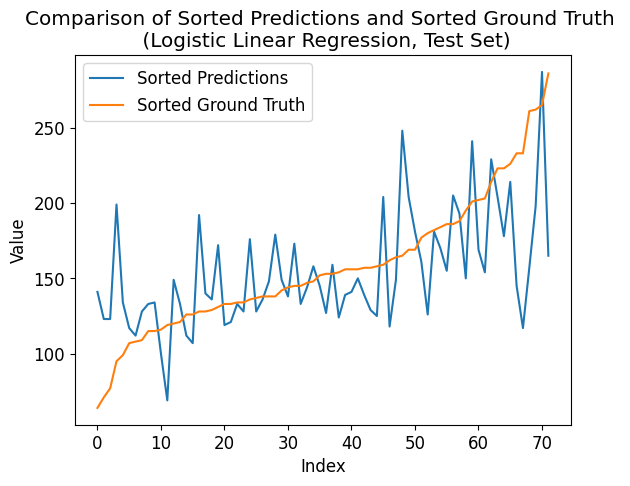

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:") # y_test doesn't include all classes, so confusion matrix is less than num_class by num_class
# print(cm)
# the columns represent the predicted labels (predictions)
# the rows represent the true labels (ground truth)
#                Predicted Class
#           |   Class 1   |   Class 2   |   Class 3   |
# -----------------------------------------------------
# True Class   |     TP1     |     FN1     |     FN1     |
# -----------------------------------------------------
# True Class   |     FP2     |     TP2     |     FN2     |
# -----------------------------------------------------
# True Class   |     FN3     |     FP3     |     TP3     |

mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

# Calculate the correlation coefficient
correlation = np.corrcoef(y_pred, y_test)[0, 1]
print("Correlation coefficient:", correlation)

r_squared = r2_score(y_test, y_pred)
print("Coefficient of determination (R-squared score, R2 score):", r_squared)


# Sort y_pred and y_test based on y_test
plot_comparison(y_test, y_pred, 'Logistic Linear Regression, Test Set')

Accuracy: 0.23757309941520469
Mean squared error: 989.3457602339181
Correlation coefficient: 0.7575196052897958
Coefficient of determination (R-squared score, R2 score): 0.5401683213286889


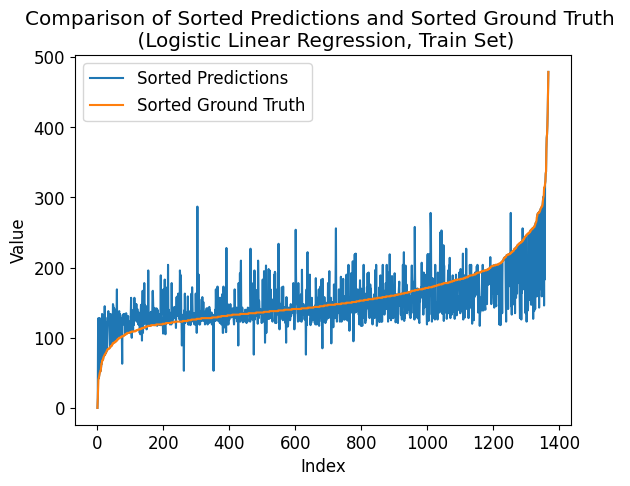

In [ ]:
# predict on train
# Use the trained model to make predictions
y_pred_ = model.predict(x_train)
# Alternatively, you can get the predicted probabilities for each class
y_prob_ = model.predict_proba(x_train)

accuracy = accuracy_score(y_train, y_pred_)
print("Accuracy:", accuracy)

# cm = confusion_matrix(y_train, y_pred_)
# print("Confusion Matrix:")
# print(cm)
# the columns represent the predicted labels (predictions)
# the rows represent the true labels (ground truth)
#                Predicted Class
#              |   Class 1   |   Class 2   |   Class 3   |
# -----------------------------------------------------
# True Class   |     TP1     |     FN1     |     FN1     |
# -----------------------------------------------------
# True Class   |     FP2     |     TP2     |     FN2     |
# -----------------------------------------------------
# True Class   |     FN3     |     FP3     |     TP3     |

mse = mean_squared_error(y_train, y_pred_)
print("Mean squared error:", mse)

# Calculate the correlation coefficient
correlation = np.corrcoef(y_pred_, y_train)[0, 1]
print("Correlation coefficient:", correlation)

r_squared = r2_score(y_train, y_pred_)
print("Coefficient of determination (R-squared score, R2 score):", r_squared)

plot_comparison(y_train, y_pred_, 'Logistic Linear Regression, Train Set')

##### Evaluate (reduced)

The model is based on classifying data into class_num (e.g., class_num = 160) intervals (histogram, by np.digitize). Here, evaluate the results a smaller number of classes (e.g., reduced_class_num = 16), that is, for the example of class_num = 160 and reduced_class_num = 16, classes 0, 1, ..., 15 become one class, i.e., 0; ...; classes 144, 145, ..., 159 become one class, i.e., 15.

In [ ]:
print("---- ---- ----")
# Define the boundaries for digitization
reduced_class_num = 16
intervals = np.arange(0, class_num + 1, class_num / reduced_class_num)
print(intervals)

y_train_digital = np.digitize(y_train, intervals) - 1
y_test_digital = np.digitize(y_test, intervals) - 1
y_pred_train_digital = np.digitize(y_pred_, intervals) - 1
y_pred_test_digital = np.digitize(y_pred, intervals) - 1
print(y_pred)
print(y_pred_test_digital)
mse = mean_squared_error(y_test_digital, y_pred_test_digital)
print("Mean squared error:", mse)
correlation = np.corrcoef(y_pred_test_digital, y_test_digital)[0, 1]
print("Correlation coefficient:", correlation)
r_squared = r2_score(y_test_digital, y_pred_test_digital)
print("Coefficient of determination (R-squared score, R2 score):", r_squared)
mse = mean_squared_error(y_train_digital, y_pred_train_digital)
print("Mean squared error:", mse)
correlation = np.corrcoef(y_pred_train_digital, y_train_digital)[0, 1]
print("Correlation coefficient:", correlation)
r_squared = r2_score(y_train_digital, y_pred_train_digital)
print("Coefficient of determination (R-squared score, R2 score):", r_squared)

---- ---- ----
[  0.  30.  60.  90. 120. 150. 180. 210. 240. 270. 300. 330. 360. 390.
 420. 450. 480.]
[126 179 214 157 148 204 134 165 193 229 129 248 123 125 112 123 107 176
 154 117 150 198 136 150 140 139 173 138 133 204 124 133 241 128 192 100
 287 127 145 121 119 172 145 128 133 144 204 178 128 118 199 159 134 181
 139 169 161 112 205 117 181 149 136  69 155 149 141 170 149 133 158 141]
[4 5 7 5 4 6 4 5 6 7 4 8 4 4 3 4 3 5 5 3 5 6 4 5 4 4 5 4 4 6 4 4 8 4 6 3 9
 4 4 4 3 5 4 4 4 4 6 5 4 3 6 5 4 6 4 5 5 3 6 3 6 4 4 2 5 4 4 5 4 4 5 4]
Mean squared error: 1.8888888888888888
Correlation coefficient: 0.5192964658142437
Coefficient of determination (R-squared score, R2 score): 0.14933541829554342
Mean squared error: 1.1995614035087718
Correlation coefficient: 0.742292500318883
Coefficient of determination (R-squared score, R2 score): 0.5145263346380143


Fixing the reduced class number, I enumerate the original class number to see what a original class number is better.

In [ ]:
# independent data
x = group_satcked_green
# dependent data (labels/targets)
y = np.squeeze(stacked_red)

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=42)
# Calculate the minimum and maximum values
infinitesimal = np.finfo(float).eps
min_val = np.min(y) - infinitesimal # to guarantee to include min
max_val = np.max(y) + infinitesimal # to guarantee to include max

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

reduced_class_num = 16
class_num_array = np.arange(reduced_class_num, reduced_class_num * 100 + 1, reduced_class_num)
# class_num_array = np.arange(reduced_class_num * 5, reduced_class_num * 40 + 1, reduced_class_num)
mse_test_list = []
correlation_test_list = []
r_squared_test_list = []
mse_train_list = []
correlation_train_list = []
r_squared_train_list = []

for class_num in class_num_array:
    print('---- ---- ----')
    print(f'class_num = {class_num}')

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=42)

    # Generate class_num+1 evenly spaced intervals
    intervals = np.linspace(min_val, max_val, num=class_num+1) # num = class num + 1
    # print(intervals)
    # Digitize the array to get the indices of the intervals
    y_train = np.digitize(y_train, intervals) - 1
    y_test = np.digitize(y_test, intervals) - 1

    # to see unique elements (see if we have all 0, 1,..., class_num-1 classes, better close to all)
    unique_elements = np.unique(y_train)
    # print("Unique elements:", unique_elements)
    print("Number of unique elements:", len(unique_elements))

    model = linear_model.LogisticRegression(fit_intercept=True, max_iter=1000, multi_class='multinomial')
    fit_result = model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    y_pred_ = model.predict(x_train)

    # Define the boundaries for digitization
    intervals = np.arange(0, class_num+1, class_num/16)
    print(intervals)

    y_train_digital = np.digitize(y_train, intervals) - 1
    y_test_digital = np.digitize(y_test, intervals) - 1
    y_pred_train_digital = np.digitize(y_pred_, intervals) - 1
    y_pred_test_digital = np.digitize(y_pred, intervals) - 1
    # print(y_pred)
    # print(y_pred_test_digital)
    print("test eval:")
    mse = mean_squared_error(y_test_digital, y_pred_test_digital)
    print("Mean squared error:", mse)
    correlation = np.corrcoef(y_pred_test_digital, y_test_digital)[0, 1]
    print("Correlation coefficient:", correlation)
    r_squared = r2_score(y_test_digital, y_pred_test_digital)
    print("Coefficient of determination (R-squared score, R2 score):", r_squared)
    mse_test_list.append(mse)
    correlation_test_list.append(correlation)
    r_squared_test_list.append(r_squared)

    print("train eval:")
    mse = mean_squared_error(y_train_digital, y_pred_train_digital)
    print("Mean squared error:", mse)
    correlation = np.corrcoef(y_pred_train_digital, y_train_digital)[0, 1]
    print("Correlation coefficient:", correlation)
    r_squared = r2_score(y_train_digital, y_pred_train_digital)
    print("Coefficient of determination (R-squared score, R2 score):", r_squared)
    mse_train_list.append(mse)
    correlation_train_list.append(correlation)
    r_squared_train_list.append(r_squared)

    plot_comparison(y_test, y_pred, f'Logistic Linear Regression Reduced Evaluation {class_num} to {reduced_class_num}, Test Set')
    plot_comparison(y_train, y_pred_, f'Logistic Linear Regression Reduced Evaluation {class_num} to {reduced_class_num}, Train Set')



In [ ]:
# plot the trend figures of mse, correlation, and r2

# Create a figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))

# Plot MSE
ax1.plot(class_num_array, mse_test_list, label='MSE (Test)')
ax1.plot(class_num_array, mse_train_list, label='MSE (Train)')
ax1.set_ylabel('MSE')
ax1.set_xlabel('Original Class Number')
ax1.set_title(f'MSE Curve (reduced class num is {reduced_class_num})')
ax1.legend()

# Plot Correlation
ax2.plot(class_num_array, correlation_test_list, label='Correlation (Test)')
ax2.plot(class_num_array, correlation_train_list, label='Correlation (Train)')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Original Class Number')
ax2.set_title(f'Correlation Curve (reduced class num is {reduced_class_num})')
ax2.legend()

# Plot R-squared
ax3.plot(class_num_array, r_squared_test_list, label='R-squared (Test)')
ax3.plot(class_num_array, r_squared_train_list, label='R-squared (Train)')
ax3.set_ylabel('R-squared')
ax3.set_xlabel('Original Class Number')
ax3.set_title(f'R-squared Curve (reduced class num is {reduced_class_num})')
ax3.legend()

# Increase the vertical spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Adjust tick, label, title, and legend font sizes
plt.rcParams.update({'font.size': 12})
ax1.tick_params(labelsize=10)
ax2.tick_params(labelsize=10)
ax3.tick_params(labelsize=10)

# Save the figure
plt.savefig(f'mse_correlation_r2_trend_curve_reduced_eval_reduced_class_num_{reduced_class_num}.png', bbox_inches='tight')

# Show the figure
plt.show()

# Convert r_squared_test_list to a NumPy array
r_squared_test_array = np.array(r_squared_test_list)
# Find the index of the maximum value
max_index = np.argmax(r_squared_test_array)
# Get the corresponding class_num value
max_class_num = class_num_array[max_index]

# Print the index and corresponding class_num
print("Max Index:", max_index)
print("Max Original Class Num:", max_class_num)

In [ ]:
# calculate the mean value for the metrics in all situations
mse_test_array = np.array(mse_test_list)
r_squared_test_array = np.array(r_squared_test_list)
mse_train_array = np.array(mse_train_list)
r_squared_train_array = np.array(r_squared_train_list)
mse_test_mean = np.mean(mse_test_array)
r_squared_test_mean = np.mean(r_squared_test_array)
mse_train_mean = np.mean(mse_train_array)
r_squared_train_mean = np.mean(r_squared_train_array)

# Print the index and corresponding class_num
print("mean of mse test:", mse_test_mean)
print("mean of r2 score test:", r_squared_test_mean)
print("mean of mse train:", mse_train_mean)
print("mean of r2 score train:", r_squared_train_mean)
